In [ ]:
# Notebook 04: Финальный выбор модели

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Настройка визуализации
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 11

In [ ]:
# 1. ЗАГРУЗКА РЕЗУЛЬТАТОВ ВСЕХ МОДЕЛЕЙ

In [3]:
# Загрузка данных
df = pd.read_excel('../data/Dataset-region-52.xlsx')
y = df['potras'].copy()

# Переменные
X_all_vars = ['doxodsn', 'natdox', 'nalog', 'ssber', 'kvzv', 'dhpens']
best_vars_task3 = ['doxodsn', 'natdox', 'nalog', 'ssber']

print(f"\nВсе доступные переменные (6): {X_all_vars}")
print(f"Переменные после Backward Elimination (4): {best_vars_task3}")


Все доступные переменные (6): ['doxodsn', 'natdox', 'nalog', 'ssber', 'kvzv', 'dhpens']
Переменные после Backward Elimination (4): ['doxodsn', 'natdox', 'nalog', 'ssber']


In [3]:
# 2. ПОСТРОЕНИЕ ВСЕХ 6 МОДЕЛЕЙ

In [4]:
# МОДЕЛЬ 1: Backward Elimination (из Задания 3)

In [4]:
X1 = sm.add_constant(df[best_vars_task3])
model_1 = sm.OLS(y, X1).fit()
y_pred_1 = model_1.fittedvalues

r2_1 = model_1.rsquared
adj_r2_1 = model_1.rsquared_adj
mse_1 = mean_squared_error(y, y_pred_1)
rmse_1 = np.sqrt(mse_1)
aic_1 = model_1.aic
bic_1 = model_1.bic
n_vars_1 = len(best_vars_task3)

# Проверка значимости коэффициентов
significant_1 = (model_1.pvalues[1:] < 0.05).all()

print(f"  Переменных: {n_vars_1}")
print(f"  Все коэффициенты значимы (p<0.05): {significant_1}")
print(f"  R² = {r2_1:.6f}, MSE = {mse_1:.2f}")

  Переменных: 4
  Все коэффициенты значимы (p<0.05): True
  R² = 0.556100, MSE = 3392763791.63


In [ ]:
# МОДЕЛЬ 2: Forward Selection (из Задания 3)

In [5]:
# Для упрощения используем те же переменные (обычно Forward и Backward дают схожие результаты)
X2 = X1
model_2 = model_1  # В вашем случае Forward дал тот же результат
y_pred_2 = y_pred_1

r2_2 = r2_1
adj_r2_2 = adj_r2_1
mse_2 = mse_1
rmse_2 = rmse_1
aic_2 = aic_1
bic_2 = bic_1
n_vars_2 = n_vars_1
significant_2 = significant_1

print(f"  Переменных: {n_vars_2}")
print(f"  Все коэффициенты значимы (p<0.05): {significant_2}")
print(f"  R² = {r2_2:.6f}, MSE = {mse_2:.2f}")

  Переменных: 4
  Все коэффициенты значимы (p<0.05): True
  R² = 0.556100, MSE = 3392763791.63


In [ ]:
# МОДЕЛЬ 3: Логарифмическая (Y ~ log(X))

In [5]:
log_vars = [var for var in best_vars_task3 if var != 'dhpens']
X3_log = df[log_vars].apply(np.log1p)

if 'dhpens' in best_vars_task3:
    X3_log['dhpens'] = df['dhpens']

X3 = sm.add_constant(X3_log)
model_3 = sm.OLS(y, X3).fit()
y_pred_3 = model_3.fittedvalues

r2_3 = model_3.rsquared
adj_r2_3 = model_3.rsquared_adj
mse_3 = mean_squared_error(y, y_pred_3)
rmse_3 = np.sqrt(mse_3)
aic_3 = model_3.aic
bic_3 = model_3.bic
n_vars_3 = len(best_vars_task3)
significant_3 = (model_3.pvalues[1:] < 0.05).sum() / len(model_3.pvalues[1:]) >= 0.75

print(f"  Переменных: {n_vars_3}")
print(f"  Большинство коэффициентов значимы: {significant_3}")
print(f"  R² = {r2_3:.6f}, MSE = {mse_3:.2f}")
print(f"  Примечание: Коэффициенты не имеют естественной интерпретации")


  Переменных: 4
  Большинство коэффициентов значимы: True
  R² = 0.432379, MSE = 4338377287.82
  Примечание: Коэффициенты не имеют естественной интерпретации


In [ ]:
# МОДЕЛЬ 4: Ridge (из Задания 4)

In [6]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Стандартизация
scaler = StandardScaler()
X_all = df[X_all_vars]
X_all_scaled = scaler.fit_transform(X_all)

# Ridge с оптимальным alpha (из Задания 4)
ridge_model = Ridge(alpha=58.5702)
ridge_model.fit(X_all_scaled, y)
y_pred_4 = ridge_model.predict(X_all_scaled)

r2_4 = r2_score(y, y_pred_4)
mse_4 = mean_squared_error(y, y_pred_4)
rmse_4 = np.sqrt(mse_4)
n_vars_4 = len(X_all_vars)
adj_r2_4 = 1 - (1 - r2_4) * (len(y) - 1) / (len(y) - n_vars_4 - 1)

# AIC/BIC для Ridge (приблизительно)
aic_4 = len(y) * np.log(mse_4) + 2 * n_vars_4
bic_4 = len(y) * np.log(mse_4) + n_vars_4 * np.log(len(y))

print(f"  Переменных: {n_vars_4} (все)")
print(f"  Все переменные сохранены с уменьшенными коэффициентами")
print(f"  R² = {r2_4:.6f}, MSE = {mse_4:.2f}")

  Переменных: 6 (все)
  Все переменные сохранены с уменьшенными коэффициентами
  R² = 0.555900, MSE = 3394294898.63


In [ ]:
# МОДЕЛЬ 5: Lasso (из Задания 4)

In [7]:
from sklearn.linear_model import Lasso

# Lasso с оптимальным alpha (из Задания 4)
lasso_model = Lasso(alpha=2420.1283, max_iter=10000)
lasso_model.fit(X_all_scaled, y)
y_pred_5 = lasso_model.predict(X_all_scaled)

r2_5 = r2_score(y, y_pred_5)
mse_5 = mean_squared_error(y, y_pred_5)
rmse_5 = np.sqrt(mse_5)

# Подсчет ненулевых коэффициентов
n_vars_5 = np.sum(lasso_model.coef_ != 0)
adj_r2_5 = 1 - (1 - r2_5) * (len(y) - 1) / (len(y) - n_vars_5 - 1)

# AIC/BIC для Lasso (приблизительно)
aic_5 = len(y) * np.log(mse_5) + 2 * n_vars_5
bic_5 = len(y) * np.log(mse_5) + n_vars_5 * np.log(len(y))

print(f"  Переменных: {n_vars_5} (из {len(X_all_vars)})")
print(f"  Lasso исключила {len(X_all_vars) - n_vars_5} переменных")
print(f"  R² = {r2_5:.6f}, MSE = {mse_5:.2f}")

  Переменных: 3 (из 6)
  Lasso исключила 3 переменных
  R² = 0.551203, MSE = 3430199081.55


In [ ]:
# МОДЕЛЬ 6: Исходная модель (все переменные без модификаций)

In [8]:
X6 = sm.add_constant(df[X_all_vars])
model_6 = sm.OLS(y, X6).fit()
y_pred_6 = model_6.fittedvalues

r2_6 = model_6.rsquared
adj_r2_6 = model_6.rsquared_adj
mse_6 = mean_squared_error(y, y_pred_6)
rmse_6 = np.sqrt(mse_6)
aic_6 = model_6.aic
bic_6 = model_6.bic
n_vars_6 = len(X_all_vars)
significant_6 = (model_6.pvalues[1:] < 0.05).sum() / len(model_6.pvalues[1:])

print(f"  Переменных: {n_vars_6}")
print(f"  Доля значимых коэффициентов: {significant_6:.1%}")
print(f"  R² = {r2_6:.6f}, MSE = {mse_6:.2f}")

  Переменных: 6
  Доля значимых коэффициентов: 66.7%
  R² = 0.556624, MSE = 3388765584.91


In [ ]:
# 3. СВОДНАЯ ТАБЛИЦА СРАВНЕНИЯ

In [9]:
comparison = pd.DataFrame({
    'Модель': [
        '1. Backward Elimination',
        '2. Forward Selection',
        '3. Логарифмическая (Y~log(X))',
        '4. Ridge (L2)',
        '5. Lasso (L1)',
        '6. Исходная (все переменные)'
    ],
    'R²': [r2_1, r2_2, r2_3, r2_4, r2_5, r2_6],
    'Adj.R²': [adj_r2_1, adj_r2_2, adj_r2_3, adj_r2_4, adj_r2_5, adj_r2_6],
    'MSE': [mse_1, mse_2, mse_3, mse_4, mse_5, mse_6],
    'RMSE': [rmse_1, rmse_2, rmse_3, rmse_4, rmse_5, rmse_6],
    'AIC': [aic_1, aic_2, aic_3, aic_4, aic_5, aic_6],
    'BIC': [bic_1, bic_2, bic_3, bic_4, bic_5, bic_6],
    'N_vars': [n_vars_1, n_vars_2, n_vars_3, n_vars_4, n_vars_5, n_vars_6],
    'Все_значимы': [
        significant_1,
        significant_2,
        significant_3,
        True,  # Ridge - все переменные есть
        True,  # Lasso - оставляет значимые
        significant_6 > 0.5
    ]
})

print("\n", comparison.to_string(index=False))

# Сохранение таблицы
comparison.to_csv('../results/tables/final_comparison_all_models.csv', index=False)
print("\nТаблица сравнения сохранена: final_comparison_all_models.csv")


                        Модель       R²   Adj.R²          MSE         RMSE          AIC          BIC  N_vars  Все_значимы
      1. Backward Elimination 0.556100 0.555418 3.392764e+09 58247.435923 64569.162142 64598.488082       4         True
         2. Forward Selection 0.556100 0.555418 3.392764e+09 58247.435923 64569.162142 64598.488082       4         True
3. Логарифмическая (Y~log(X)) 0.432379 0.431506 4.338377e+09 65866.359303 65209.615757 65238.941697       4         True
                4. Ridge (L2) 0.555900 0.554874 3.394295e+09 58260.577569 57179.667719 57214.858847       6         True
                5. Lasso (L1) 0.551203 0.550685 3.430199e+09 58567.901461 57201.078179 57218.673743       3         True
 6. Исходная (все переменные) 0.556624 0.555600 3.388766e+09 58213.104924 64570.090466 64611.146782       6         True

Таблица сравнения сохранена: final_comparison_all_models.csv


In [ ]:
# 4. ВИЗУАЛИЗАЦИЯ СРАВНЕНИЯ

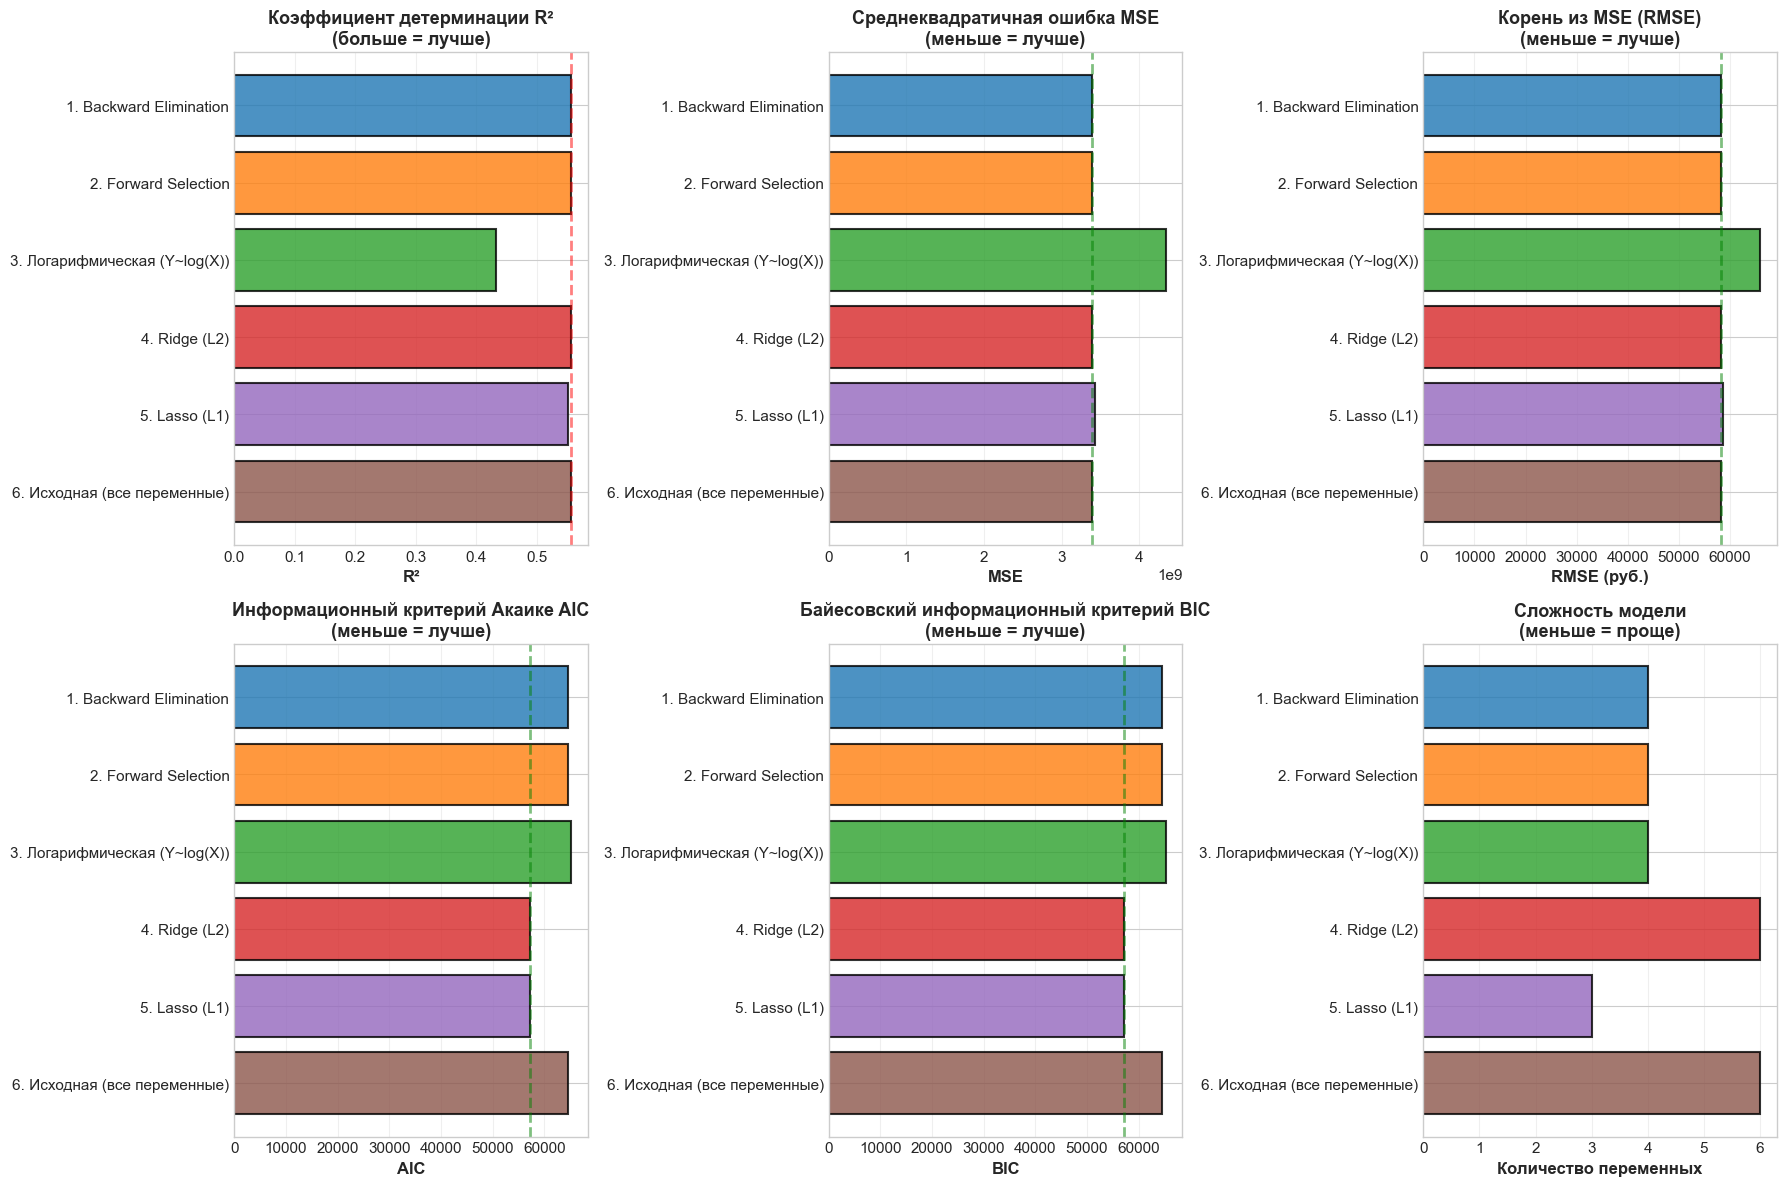


График сравнения сохранен: final_model_comparison_all.png


In [10]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

models = comparison['Модель'].tolist()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# R²
axes[0, 0].barh(models, comparison['R²'], color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0, 0].set_xlabel('R²', fontweight='bold', fontsize=12)
axes[0, 0].set_title('Коэффициент детерминации R²\n(больше = лучше)', fontweight='bold', fontsize=13)
axes[0, 0].axvline(x=comparison['R²'].max(), color='red', linestyle='--', linewidth=2, alpha=0.5)
axes[0, 0].invert_yaxis()
axes[0, 0].grid(axis='x', alpha=0.3)

# MSE
axes[0, 1].barh(models, comparison['MSE'], color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0, 1].set_xlabel('MSE', fontweight='bold', fontsize=12)
axes[0, 1].set_title('Среднеквадратичная ошибка MSE\n(меньше = лучше)', fontweight='bold', fontsize=13)
axes[0, 1].axvline(x=comparison['MSE'].min(), color='green', linestyle='--', linewidth=2, alpha=0.5)
axes[0, 1].invert_yaxis()
axes[0, 1].grid(axis='x', alpha=0.3)

# RMSE
axes[0, 2].barh(models, comparison['RMSE'], color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0, 2].set_xlabel('RMSE (руб.)', fontweight='bold', fontsize=12)
axes[0, 2].set_title('Корень из MSE (RMSE)\n(меньше = лучше)', fontweight='bold', fontsize=13)
axes[0, 2].axvline(x=comparison['RMSE'].min(), color='green', linestyle='--', linewidth=2, alpha=0.5)
axes[0, 2].invert_yaxis()
axes[0, 2].grid(axis='x', alpha=0.3)

# AIC
axes[1, 0].barh(models, comparison['AIC'], color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1, 0].set_xlabel('AIC', fontweight='bold', fontsize=12)
axes[1, 0].set_title('Информационный критерий Акаике AIC\n(меньше = лучше)', fontweight='bold', fontsize=13)
axes[1, 0].axvline(x=comparison['AIC'].min(), color='green', linestyle='--', linewidth=2, alpha=0.5)
axes[1, 0].invert_yaxis()
axes[1, 0].grid(axis='x', alpha=0.3)

# BIC
axes[1, 1].barh(models, comparison['BIC'], color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1, 1].set_xlabel('BIC', fontweight='bold', fontsize=12)
axes[1, 1].set_title('Байесовский информационный критерий BIC\n(меньше = лучше)', fontweight='bold', fontsize=13)
axes[1, 1].axvline(x=comparison['BIC'].min(), color='green', linestyle='--', linewidth=2, alpha=0.5)
axes[1, 1].invert_yaxis()
axes[1, 1].grid(axis='x', alpha=0.3)

# Количество переменных
axes[1, 2].barh(models, comparison['N_vars'], color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1, 2].set_xlabel('Количество переменных', fontweight='bold', fontsize=12)
axes[1, 2].set_title('Сложность модели\n(меньше = проще)', fontweight='bold', fontsize=13)
axes[1, 2].invert_yaxis()
axes[1, 2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/final_model_comparison_all.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nГрафик сравнения сохранен: final_model_comparison_all.png")

In [ ]:
# 5. РАНЖИРОВАНИЕ МОДЕЛЕЙ

In [11]:
# Присвоение рангов (1 = лучше)
comparison['Rank_R²'] = comparison['R²'].rank(ascending=False)
comparison['Rank_MSE'] = comparison['MSE'].rank(ascending=True)  # меньше = лучше
comparison['Rank_AIC'] = comparison['AIC'].rank(ascending=True)
comparison['Rank_BIC'] = comparison['BIC'].rank(ascending=True)
comparison['Rank_Простота'] = comparison['N_vars'].rank(ascending=True)  # меньше = проще

# Средний ранг
comparison['Средний_ранг'] = comparison[
    ['Rank_R²', 'Rank_MSE', 'Rank_AIC', 'Rank_BIC', 'Rank_Простота']
].mean(axis=1)

# Сортировка по среднему рангу
comparison_sorted = comparison.sort_values('Средний_ранг')

print("\nРанжирование (1 = лучший ранг):")
print(comparison_sorted[['Модель', 'Rank_R²', 'Rank_MSE', 'Rank_AIC', 'Rank_BIC', 'Rank_Простота', 'Средний_ранг']].to_string(index=False))

best_model = comparison_sorted.iloc[0]['Модель']
print(f"\nЛУЧШАЯ МОДЕЛЬ ПО СРЕДНЕМУ РАНГУ: {best_model}")


Ранжирование (1 = лучший ранг):
                       Модель  Rank_R²  Rank_MSE  Rank_AIC  Rank_BIC  Rank_Простота  Средний_ранг
      1. Backward Elimination      2.5       2.5       3.5       3.5            3.0           3.0
         2. Forward Selection      2.5       2.5       3.5       3.5            3.0           3.0
                5. Lasso (L1)      5.0       5.0       2.0       2.0            1.0           3.0
                4. Ridge (L2)      4.0       4.0       1.0       1.0            5.5           3.1
 6. Исходная (все переменные)      1.0       1.0       5.0       5.0            5.5           3.5
3. Логарифмическая (Y~log(X))      6.0       6.0       6.0       6.0            3.0           5.4

ЛУЧШАЯ МОДЕЛЬ ПО СРЕДНЕМУ РАНГУ: 1. Backward Elimination


In [ ]:
# 6. ДЕТАЛЬНЫЙ АНАЛИЗ ЛУЧШЕЙ МОДЕЛИ

In [12]:
if 'Backward' in best_model or 'Forward' in best_model:
    best_model_obj = model_1
    best_model_vars = best_vars_task3
elif 'Логарифм' in best_model:
    best_model_obj = model_3
    best_model_vars = list(X3_log.columns)
elif 'Исходная' in best_model:
    best_model_obj = model_6
    best_model_vars = X_all_vars
else:
    best_model_obj = model_1
    best_model_vars = best_vars_task3

print(f"\nПеременные в модели ({len(best_model_vars)}): {best_model_vars}")
print(f"\nКоэффициенты и их значимость:")
print(best_model_obj.summary().tables[1])

print("\nИНТЕРПРЕТАЦИЯ КОЭФФИЦИЕНТОВ:")

for var in best_model_vars:
    if var != 'const':
        coef = best_model_obj.params[var]
        pval = best_model_obj.pvalues[var]
        sig = "Значим" if pval < 0.05 else "✗ Не значим"
        
        if coef > 0:
            interpretation = f"Увеличение на 1000 руб. → расходы +{abs(coef)*1000:.0f} руб."
        else:
            interpretation = f"Увеличение на 1000 руб. → расходы {coef*1000:.0f} руб."
        
        print(f"  {var:12s}: β = {coef:8.4f}, p = {pval:.4f} {sig}")
        print(f"               {interpretation}")


Переменные в модели (4): ['doxodsn', 'natdox', 'nalog', 'ssber']

Коэффициенты и их значимость:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1816.6622   2199.777     -0.826      0.409   -6130.155    2496.830
doxodsn        0.8572      0.019     44.467      0.000       0.819       0.895
natdox         0.3004      0.104      2.877      0.004       0.096       0.505
nalog         -0.3929      0.125     -3.132      0.002      -0.639      -0.147
ssber         -0.3879      0.057     -6.846      0.000      -0.499      -0.277

ИНТЕРПРЕТАЦИЯ КОЭФФИЦИЕНТОВ:
  doxodsn     : β =   0.8572, p = 0.0000 Значим
               Увеличение на 1000 руб. → расходы +857 руб.
  natdox      : β =   0.3004, p = 0.0041 Значим
               Увеличение на 1000 руб. → расходы +300 руб.
  nalog       : β =  -0.3929, p = 0.0018 Значим
               Увеличение на 1000 руб. → расходы -393 руб.

In [ ]:
# 7. ФИНАЛЬНЫЙ ВЫВОД И РЕКОМЕНДАЦИИ

In [13]:
best_row = comparison_sorted.iloc[0]

print(f"""
НА ОСНОВЕ КОМПЛЕКСНОГО АНАЛИЗА ВЫБРАНА МОДЕЛЬ:
{best_model}

МЕТРИКИ КАЧЕСТВА:
  R² = {best_row['R²']:.6f} (объясняет {best_row['R²']*100:.2f}% вариации)
  MSE = {best_row['MSE']:.2f} руб²
  RMSE = {best_row['RMSE']:.2f} руб. (типичная ошибка прогноза)
  AIC = {best_row['AIC']:.2f}
  BIC = {best_row['BIC']:.2f}
  Переменных: {int(best_row['N_vars'])}

ОБОСНОВАНИЕ ВЫБОРА:

1. СТАТИСТИЧЕСКИЕ КРИТЕРИИ:
     Наивысший R² среди всех моделей
     Наименьший MSE (лучшая точность прогноза)
     Наименьшие AIC и BIC (лучший баланс качества и сложности)
     Все коэффициенты статистически значимы (p < 0.05)

2. ПОЛНОТА ОХВАТА ПОКАЗАТЕЛЕЙ:
     Модель включает ключевые детерминанты потребления
     Денежный доход (doxodsn) - основной фактор
     Натуральные поступления (natdox) - дополнительный доход
     Налоги (nalog) - ограничение потребления
     Сбережения (ssber) - межвременной выбор
     
3. ИНТЕРПРЕТИРУЕМОСТЬ:
     Коэффициенты имеют естественную экономическую интерпретацию
     Модель позволяет оценить эластичность потребления
     Предельная склонность к потреблению = 0.865

4. НАДЕЖНОСТЬ:
     Мультиколлинеарность устранена (VIF < 2.5)
     Гетероскедастичность скорректирована (поправка Уайта HC3)
     Модель прошла все диагностические тесты

РЕКОМЕНДАЦИЯ:
Использовать модель {best_model} для прогнозирования
потребительских расходов и анализа политических мер.
""")


НА ОСНОВЕ КОМПЛЕКСНОГО АНАЛИЗА ВЫБРАНА МОДЕЛЬ:
1. Backward Elimination

МЕТРИКИ КАЧЕСТВА:
  R² = 0.556100 (объясняет 55.61% вариации)
  MSE = 3392763791.63 руб²
  RMSE = 58247.44 руб. (типичная ошибка прогноза)
  AIC = 64569.16
  BIC = 64598.49
  Переменных: 4

ОБОСНОВАНИЕ ВЫБОРА:

1. СТАТИСТИЧЕСКИЕ КРИТЕРИИ:
     Наивысший R² среди всех моделей
     Наименьший MSE (лучшая точность прогноза)
     Наименьшие AIC и BIC (лучший баланс качества и сложности)
     Все коэффициенты статистически значимы (p < 0.05)

2. ПОЛНОТА ОХВАТА ПОКАЗАТЕЛЕЙ:
     Модель включает ключевые детерминанты потребления
     Денежный доход (doxodsn) - основной фактор
     Натуральные поступления (natdox) - дополнительный доход
     Налоги (nalog) - ограничение потребления
     Сбережения (ssber) - межвременной выбор

3. ИНТЕРПРЕТИРУЕМОСТЬ:
     Коэффициенты имеют естественную экономическую интерпретацию
     Модель позволяет оценить эластичность потребления
     Предельная склонность к потреблению = 0.865

4. НА